## Customer Segmentation

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

## Preprocessing

In [8]:
file_path = 'train.csv'

data = pd.read_csv(file_path, delimiter=',')
data.replace('?', np.nan, inplace=True)

data['Date'] = data['Date'].astype(str)
data['Time'] = data['Time'].astype(str)
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True, errors='coerce')
data = data.drop(columns=['Date', 'Time'])
data = data.dropna(subset=['Datetime'])

for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

data = data.fillna(data.mean(numeric_only=True))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Datetime']))
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[:-1])

## Analysis

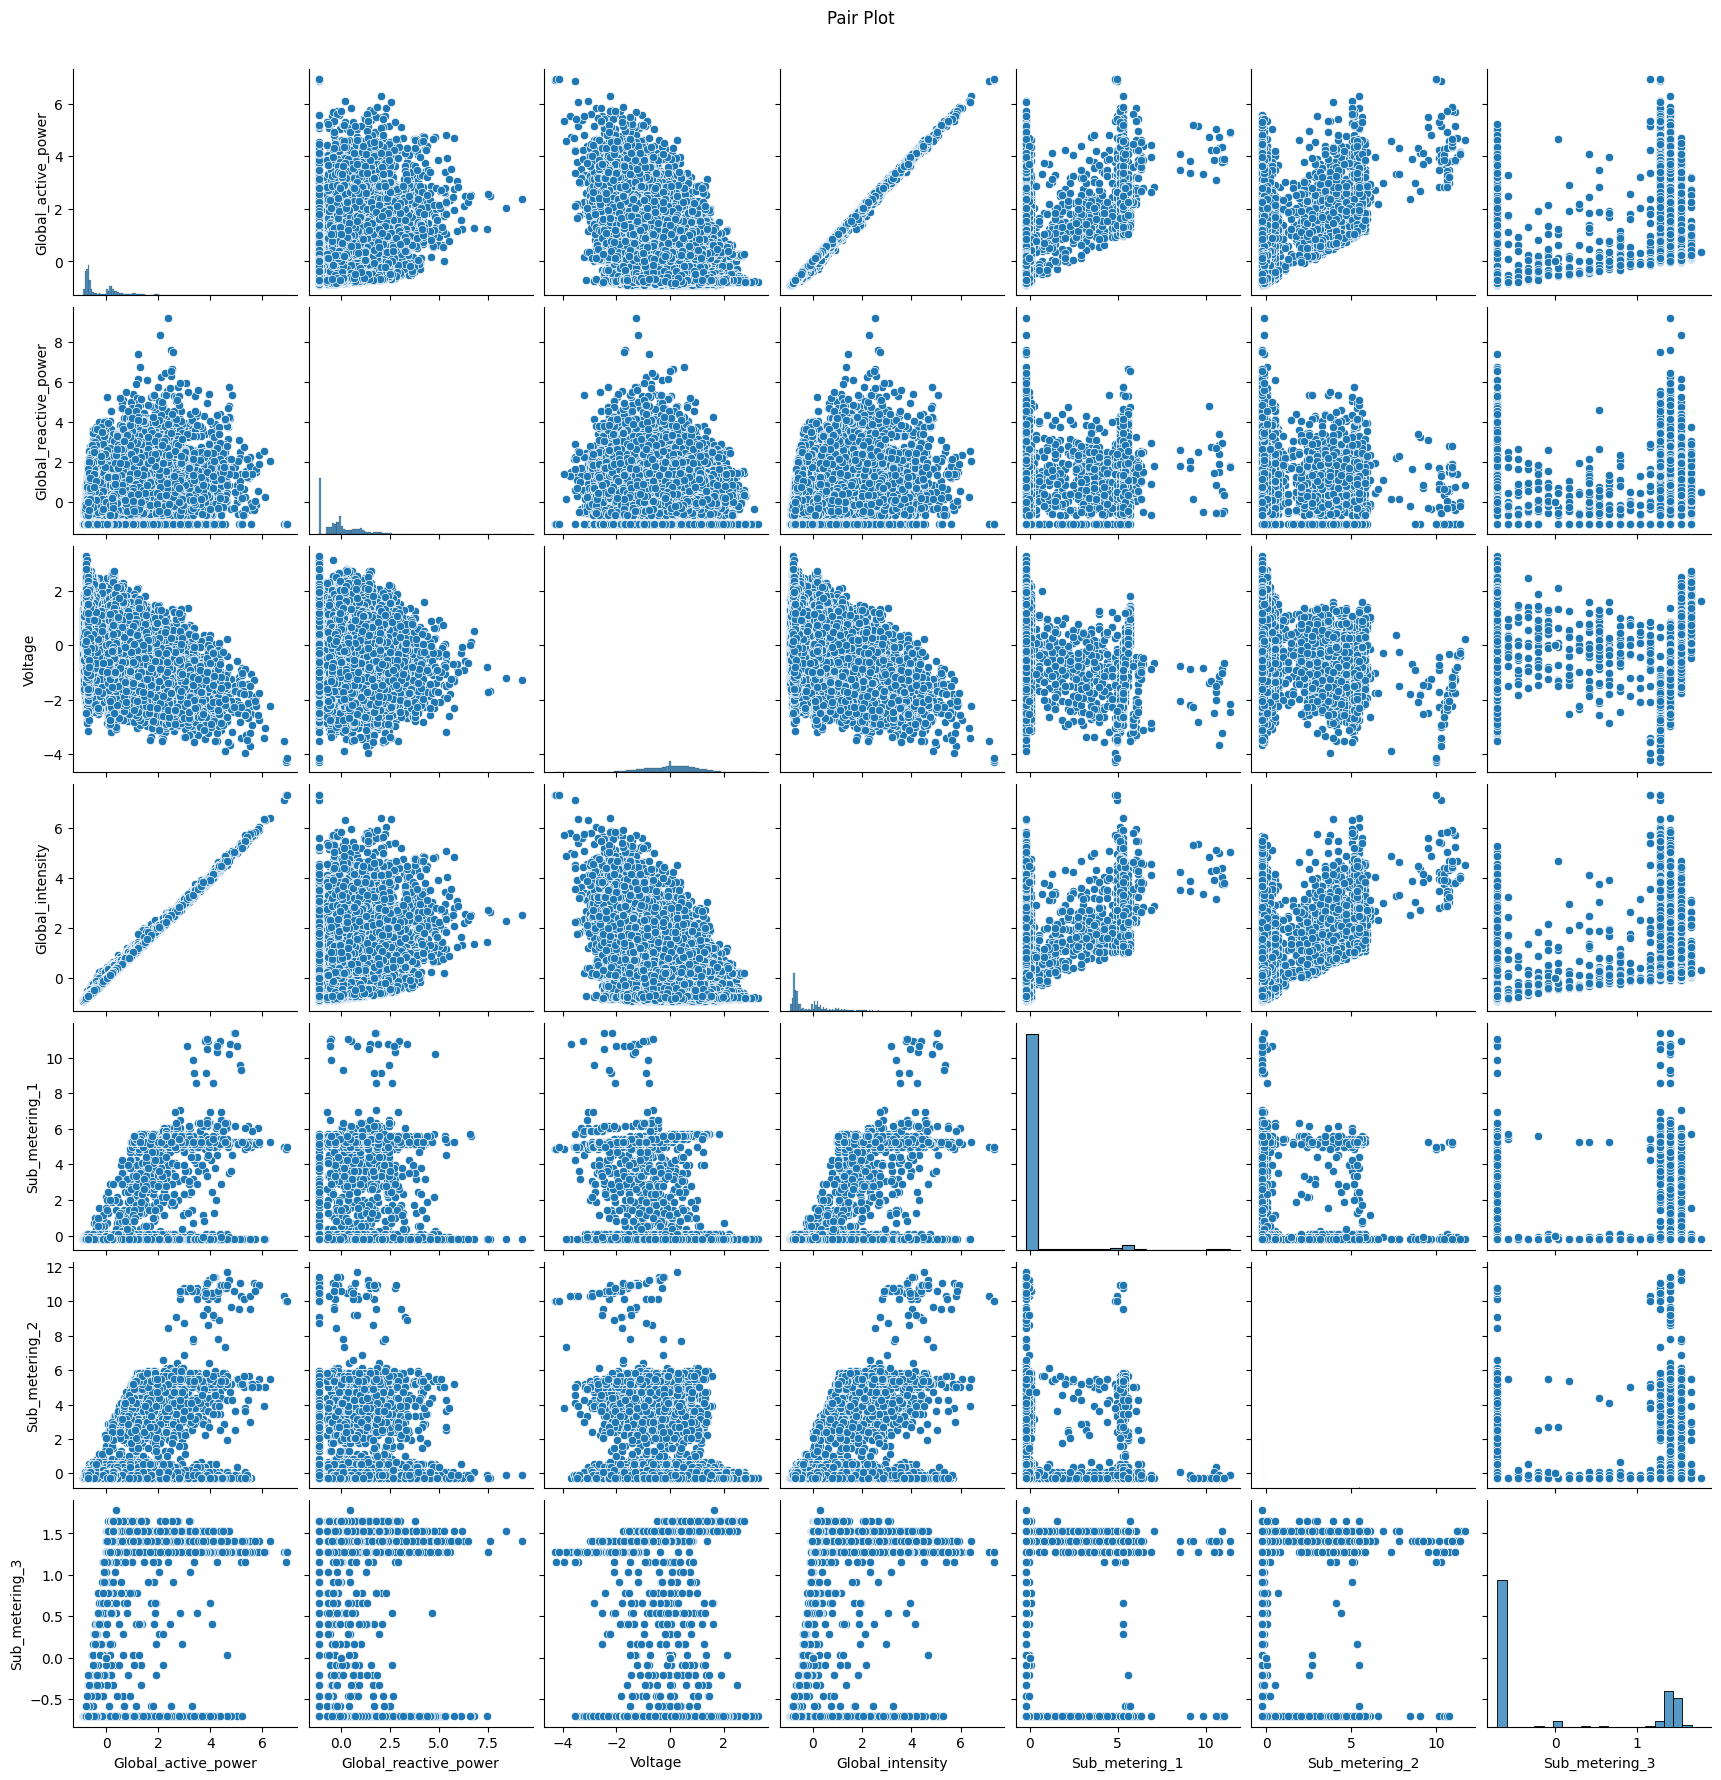

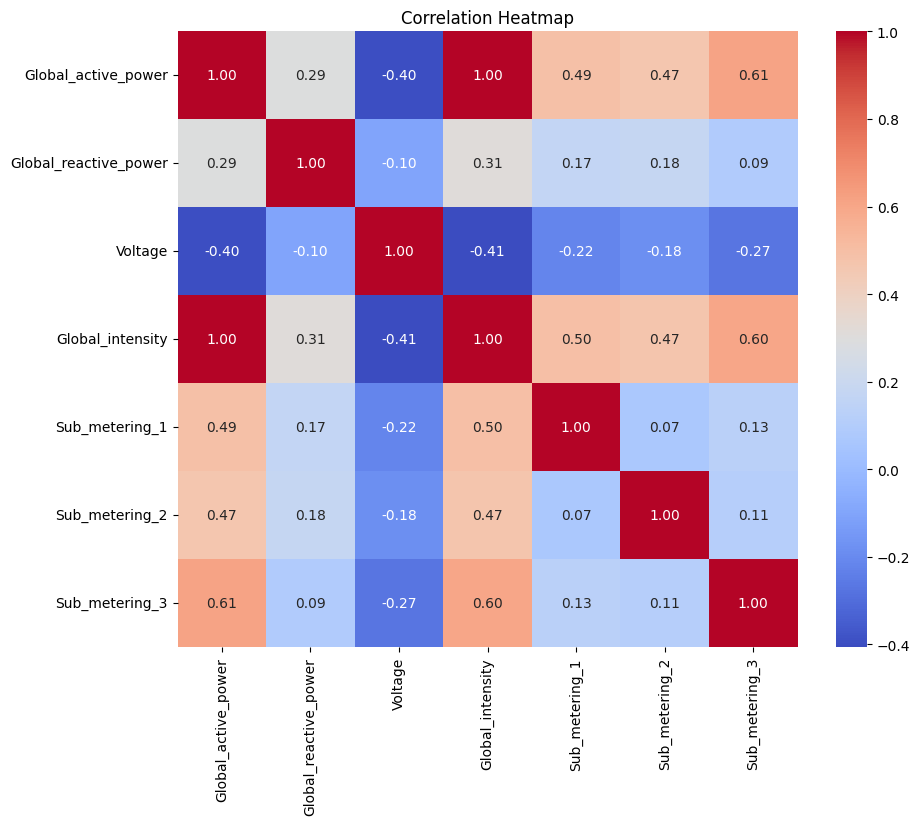

In [9]:
sns.pairplot(scaled_data)
plt.suptitle("Pair Plot", y=1.02)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(scaled_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

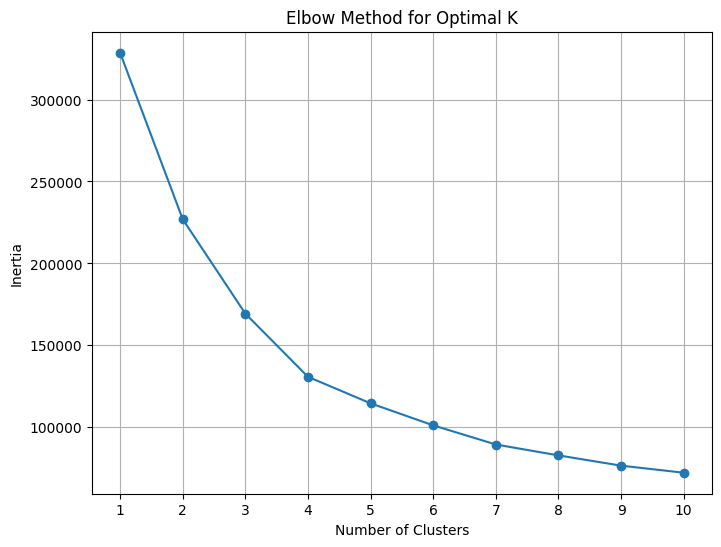

In [10]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

## Model Training

In [16]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##  Model Evaluation

In [17]:
silhouette_avg = silhouette_score(scaled_data, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')
db_index = davies_bouldin_score(scaled_data, data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Silhouette Score: 0.4081917719642258
Davies-Bouldin Index: 1.2269878058749135


## Model Application

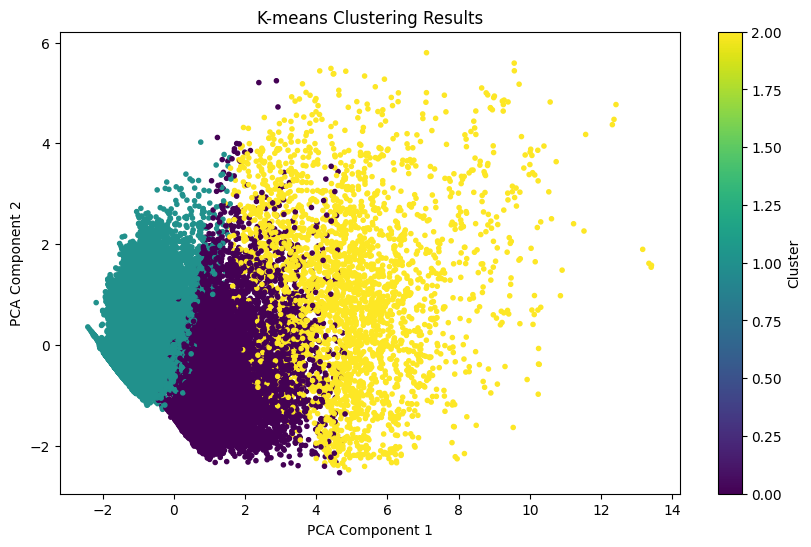

In [18]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['Cluster'], cmap='viridis', marker='.')
plt.title('K-means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

clustered_file_path = 'clustered_data.csv'
data.to_csv(clustered_file_path, index=False)